In [2]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import statsmodels.api as sm

C:\Users\Priyanka\Miniconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


## Downloading a sample stock data

In [3]:
df = web.DataReader("SBIN.BO","yahoo","2019-10-1","2020-10-25")

In [4]:
df[["Close"]].plot()

## Computing the half life of a stock

Statistical test for mean reversion or stationarity requires atleast 90 percent probability. 

However some strategies can be profitable with much less certainty

#### E(y(t)) = y0*e^(λt)-u/λ(1-e^(λt))
λ is negative for mean reverting process, expected value of the price decays exponentially to the value -u/λ with the half life equals to -log(2)/λ



In [6]:
def computehalflife(df):
    ''''''
    df_lag = df.shift(1)
    #replacing the first value of nan
    df_lag.iloc[0] = df_lag.iloc[1]
    
    #replacing the first value of nan
    df_ret = df - df_lag
    df_ret.iloc[0] = df_ret.iloc[1]

    df_lag2 = sm.add_constant(df_lag)

    model = sm.OLS(df_ret,df_lag2)
    res = model.fit()

    halflife = int(round(-np.log(2) / res.params[1],0))
    print("Half life is -->  {0} days".format(halflife))
    return halflife
# get_halflife(pd.DataFrame(price))
halflife = df[["Adj Close"]].apply(computehalflife)

Half life is -->  122 days


In [7]:
halflife

Adj Close    122
dtype: int64

Using the lookback days as the half life computed above for the rolling mean and rolling standard deviation



In [8]:
df["rolling_33"] = df["Adj Close"].rolling(int(halflife)).mean()
df["rolling_33_std"] = df["Adj Close"].rolling(int(halflife)).std()

setting the number of units to be the negative z score( MarketVal )

In [9]:
df["MarketVal"] = -(df["Adj Close"]-df["rolling_33"])/df["rolling_33_std"]

In [10]:
df["daily_PnL"] = df["MarketVal"].shift(1)*(df["Adj Close"]-df["Adj Close"].shift(1))/df["Adj Close"].shift(1)

In [29]:
# df.to_csv("C:/Users/Priyanka/OneDrive/Documents/Halflifestrategy.csv")

In [11]:
dfnew = df[["daily_PnL","Adj Close"]].dropna()

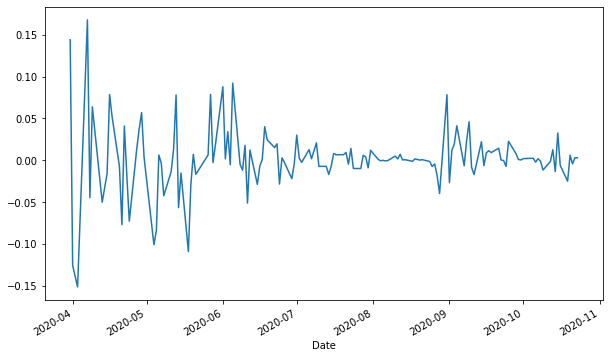

In [12]:
# (dfnew/dfnew.iloc[0]*100).plot(figsize=(14,6))
dfnew["daily_PnL"].plot(figsize=(10,6))

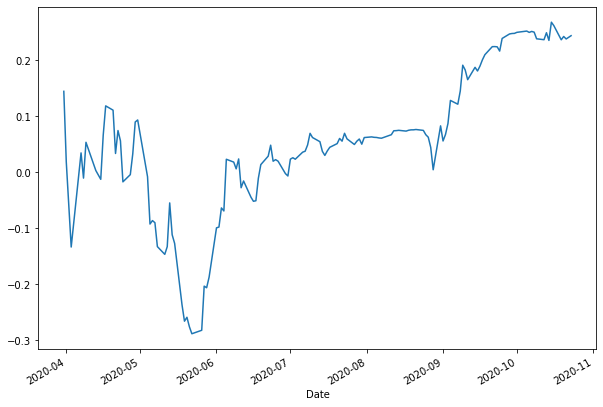

In [13]:
dfnew["daily_PnL"].cumsum().plot(label='PnL', figsize=(10,7))  

In [14]:
dfnew["daily_PnL"].cumsum()[-1]

0.24319584705566485